In [ ]:
import sys
print(sys.version)
%pwd
#git clone https://github.com/fastai/fastai.git
#cd fastai
#conda env update
#conda activate fastai

In [7]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.structured import *
from fastai.column_data import *

C:\Users\chrun\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
PATH = 'data/'

In [9]:
pd.read_csv(PATH + 'gender_submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
from IPython.display import HTML, display
table_names = ['test', 'train']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

for t in tables: display(t.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test, train = tables

In [12]:
len(train),len(test)

(891, 418)

In [13]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
train.head().T.head(82)

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [15]:
test.head().T.head(82)

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [16]:
test['Survived'] = 0

In [17]:
len(train.columns), len(test.columns)

(12, 12)

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [20]:
#train[train.isnull().sum() > 0]
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
def getTitles(names):
    titleRegex = re.compile(r',.\w+\.')    
    title = []
    for str in names:
        titlePat = re.search(titleRegex,str)
        if titlePat is None:
            title.append(str)
        else:
            x = titlePat.group()
            x = x[2:len(x)-1]
            title.append(x)
    return title


title_train = getTitles(train['Name'])
title_test = getTitles(test['Name'])

In [22]:
def getCleanTitles(title):
    for i in range(len(title)):
        if title[i] in ['Capt','Don', 'Rev','Sir']:
            title[i] = 'Mr'
        elif title[i] in ['Mme','Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)', 'Lady', 'Dona']:
            title[i] = 'Mrs'
        elif title[i] in ['Mlle', 'Ms']:
            title[i] = 'Miss'
        elif title[i] in ['Dr', 'Jonkheer', 'Col', 'Major']:
            title[i] = 'Other'
    return title

train['Title'] = getCleanTitles(title_train)
test['Title'] = getCleanTitles(title_test)

In [23]:
train['Fare'].fillna(train['Fare'].mean(), inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [24]:
cat_vars = ['Pclass', 'Name', 'Sex', 'Ticket',	'Cabin',	'Embarked', 'Title']

contin_vars = ['Fare',	'Age', 'SibSp', 'Parch']

n = len(train); n

891

In [25]:
dep = 'Survived'
train_df = train[cat_vars + contin_vars + [dep]].copy()

In [26]:
test[dep] = 0
test_df = test[cat_vars + contin_vars + [dep, 'PassengerId']].copy()

In [27]:
train_df.head()

,Pclass,Name,Sex,Ticket,Cabin,Embarked,Title,Fare,Age,SibSp,Parch,Survived
0,3,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr,7.2500,22.0,1,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs,71.2833,38.0,1,0,1
2,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss,7.9250,26.0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs,53.1000,35.0,1,0,1
4,3,"Allen, Mr. William Henry",male,373450,NaN,S,Mr,8.0500,35.0,0,0,0


In [28]:
test_df.head()

,Pclass,Name,Sex,Ticket,Cabin,Embarked,Title,Fare,Age,SibSp,Parch,Survived,PassengerId
0,3,"Kelly, Mr. James",male,330911,NaN,Q,Mr,7.8292,34.5,0,0,0,892
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S,Mrs,7.0000,47.0,1,0,0,893
2,2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q,Mr,9.6875,62.0,0,0,0,894
3,3,"Wirz, Mr. Albert",male,315154,NaN,S,Mr,8.6625,27.0,0,0,0,895
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S,Mrs,12.2875,22.0,1,1,0,896


In [29]:
train_df.nunique(), test_df.nunique()

(Pclass        3
 Name        891
 Sex           2
 Ticket      681
 Cabin       147
 Embarked      3
 Title         5
 Fare        248
 Age          88
 SibSp         7
 Parch         7
 Survived      2
 dtype: int64, Pclass           3
 Name           418
 Sex              2
 Ticket         363
 Cabin           76
 Embarked         3
 Title            5
 Fare           170
 Age             79
 SibSp            7
 Parch            8
 Survived         1
 PassengerId    418
 dtype: int64)

In [30]:
for v in cat_vars: train_df[v] = train_df[v].astype('category').cat.as_ordered()
apply_cats(test_df, train_df)
#for v in cat_vars: test_df[v] = test_df[v].astype('category').cat.as_ordered()

In [31]:
!pip install scikit-learn
from sklearn.preprocessing import Imputer

In [32]:
imputer = Imputer()
#values = train_df[contin_vars].values
train_df[contin_vars] = imputer.fit_transform(train_df[contin_vars])
#values = test_df[contin_vars].values
test_df[contin_vars] = imputer.fit_transform(test_df[contin_vars])

In [33]:
test_df.isnull().any()

Pclass         False
Name            True
Sex            False
Ticket          True
Cabin           True
Embarked       False
Title          False
Fare           False
Age            False
SibSp          False
Parch          False
Survived       False
PassengerId    False
dtype: bool

In [34]:
samp_size = n

In [35]:
#idxs = get_cv_idxs(n, val_pct=150000/n)
#train_index = train_df.iloc[idxs].set_index("date")
#samp_size = len(train_index); 

In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
Pclass         418 non-null category
Name           2 non-null category
Sex            418 non-null category
Ticket         152 non-null category
Cabin          45 non-null category
Embarked       418 non-null category
Title          418 non-null category
Fare           418 non-null float64
Age            418 non-null float64
SibSp          418 non-null float64
Parch          418 non-null float64
Survived       418 non-null int64
PassengerId    418 non-null int64
dtypes: category(7), float64(4), int64(2)
memory usage: 102.7 KB


In [37]:
#train_indexed = train_df.set_index("SoldDate")

In [38]:
train_df[dep] = train_df[dep].astype(float)
test_df[dep] = test_df[dep].astype(float)

In [39]:
df, y, nas, mapper = proc_df(train_df, 'Survived', do_scale=True)

In [40]:
yp = y + 1

In [41]:
yl = np.log(yp)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Pclass      891 non-null int8
Name        891 non-null int16
Sex         891 non-null int8
Ticket      891 non-null int16
Cabin       891 non-null int16
Embarked    891 non-null int8
Title       891 non-null int8
Fare        891 non-null float64
Age         891 non-null float64
SibSp       891 non-null float64
Parch       891 non-null float64
dtypes: float64(4), int16(3), int8(4)
memory usage: 36.6 KB


In [43]:
df_test, _, nas, mapper = proc_df(test_df, 'Survived', do_scale=True, 
                                  skip_flds=['PassengerId'], mapper=mapper, na_dict=nas)

In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass      418 non-null int8
Name        418 non-null int16
Sex         418 non-null int8
Ticket      418 non-null int16
Cabin       418 non-null int16
Embarked    418 non-null int8
Title       418 non-null int8
Fare        418 non-null float64
Age         418 non-null float64
SibSp       418 non-null float64
Parch       418 non-null float64
dtypes: float64(4), int16(3), int8(4)
memory usage: 17.2 KB


In [45]:
df_test

,Pclass,Name,Sex,Ticket,Cabin,Embarked,Title,Fare,Age,SibSp,Parch
0,3,434,2,0,0,2,3,-0.490783,0.369449,-0.474545,-0.473674
1,3,0,1,0,0,3,4,-0.507479,1.331378,0.432793,-0.473674
2,2,0,2,0,0,2,3,-0.453367,2.485693,-0.474545,-0.473674
3,3,0,2,0,0,3,3,-0.474005,-0.207709,-0.474545,-0.473674
4,3,0,1,252,0,3,4,-0.401017,-0.592481,0.432793,0.767630
5,3,0,2,0,0,3,3,-0.462679,-1.208115,-0.474545,-0.473674
6,3,178,1,0,0,2,2,-0.494810,0.023154,-0.474545,-0.473674
7,2,0,2,159,0,3,3,-0.064516,-0.284663,0.432793,0.767630
8,3,0,1,0,0,1,4,-0.502864,-0.900298,-0.474545,-0.473674
9,3,0,2,520,0,3,3,-0.162169,-0.669435,1.340132,-0.473674


In [46]:
df.head()

,Pclass,Name,Sex,Ticket,Cabin,Embarked,Title,Fare,Age,SibSp,Parch
0,3,109,2,524,0,3,3,-0.502445,-0.592481,0.432793,-0.473674
1,1,191,1,597,82,1,4,0.786845,0.638789,0.432793,-0.473674
2,3,354,1,670,0,3,2,-0.488854,-0.284663,-0.474545,-0.473674
3,1,273,1,50,56,3,4,0.420730,0.407926,0.432793,-0.473674
4,3,16,2,473,0,3,3,-0.486337,0.407926,-0.474545,-0.473674


In [47]:
train_ratio = 0.8
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [48]:
len(df), len(val_idx)

(891, 179)

In [49]:
max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [50]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl, cat_flds=cat_vars, bs=1,
                                       test_df=df_test)

In [51]:
cat_sz = [(c, len(train_df[c].cat.categories)+1) for c in cat_vars]

In [52]:
cat_sz

[('Pclass', 4),
 ('Name', 892),
 ('Sex', 3),
 ('Ticket', 682),
 ('Cabin', 148),
 ('Embarked', 4),
 ('Title', 6)]

In [64]:
emb_szs = [(c, min(20, (c+1)//2)) for _,c in cat_sz]

In [65]:
emb_szs

[(4, 2), (892, 20), (3, 2), (682, 20), (148, 20), (4, 2), (6, 3)]

In [91]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [2000,1000,500], [0.001,0.005,0.01], y_range=y_range)

In [92]:
def accuracy1(preds, targs):
    #print ('preds: {}, {}'.format(preds.shape,type(preds)))
    #print ('targs: {}, {}'.format(targs.shape,type(targs)))
    print ('preds: {}'.format(preds))
    print ('targs: {}'.format(targs))
    return (preds==targs).float().mean()
  
  
from sklearn.metrics import mean_squared_error

def exp_rmse(y_pred, targ):
    return math.sqrt(mean_squared_error(targ, y_pred))

In [93]:
m.lr_find()

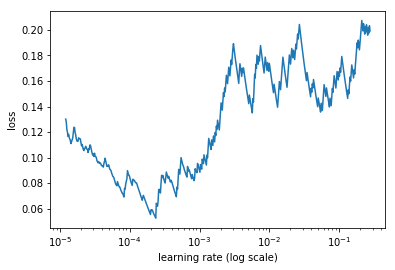

In [94]:
m.sched.plot()

In [96]:
lr = 1e-4 #0.0005

In [97]:
m.fit(lr, 3, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.07954    0.05034    0.193954  
    1      0.055646   0.049117   0.163718                                                                              
    2      0.050461   0.045659   0.15335                                                                               


[array([0.04566]), 0.15334997955669877]

In [99]:
m.save("titanic_3E")

In [101]:
m.load("titanic_3E")

In [100]:
m.fit(lr, 2, cycle_len = 3, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.052833   0.051793   0.184539  
    1      0.040172   0.049892   0.174305                                                                              
    2      0.031598   0.052266   0.177847                                                                              
    3      0.027146   0.053171   0.155026                                                                              
    4      0.007583   0.056236   0.171194                                                                              
    5      0.008968   0.058913   0.17923                                                                               


[array([0.05891]), 0.1792295165279857]

In [74]:
m.save("titanic_9E")

In [90]:
m.load("titanic_9E")

RuntimeError: While copying the parameter named lins.0.weight, whose dimensions in the model are torch.Size([2000, 73]) and whose dimensions in the checkpoint are torch.Size([250, 73]).

In [83]:
m.fit(lr, 2, metrics=[exp_rmse], cycle_len = 3, cycle_mult = 2)

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.04164    0.05114    0.187364  
    1      0.023944   0.05281    0.196294                                                                              
    2      0.031899   0.052926   0.195983                                                                              
    3      0.027968   0.052381   0.190261                                                                              
    4      0.01683    0.06156    0.212583                                                                              
    5      0.010972   0.064841   0.216863                                                                              
 27%|█████████████████▉                                                 | 190/712 [00:02<00:07, 67.90it/s, loss=0.0153]

KeyboardInterrupt: 

 27%|█████████████████▉                                                 | 190/712 [00:20<00:54,  9.50it/s, loss=0.0153]

In [ ]:
m.save("titanic_9E_9ER")

In [ ]:
m.load("titanic_9E_9ER")

In [ ]:
m.fit(lr, 4, cycle_len = 2, cycle_mult = 2, metrics=[exp_rmse])

In [ ]:
m.save("forecast_8E_24_ER")

In [ ]:
m.load("forecast_8E_24_ER")

In [ ]:
m.fit(lr, 3, metrics=[exp_rmse], cycle_len = 4, cycle_mult = 2)

# Test Set

In [102]:
x,y=m.predict_with_targs()
x = torch.from_numpy(x)
y = torch.from_numpy(y)
exp_rmse(x,y)

#pred_test=m.predict(True)

0.21367886059376393

In [103]:
log_preds = m.predict(True)

In [104]:
log_preds

array([[0.04286],
       [0.34186],
       [0.01974],
       [0.05374],
       [0.34917],
       [0.08104],
       [0.47491],
       [0.04904],
       [0.51183],
       [0.02006],
       [0.04857],
       [0.04891],
       [0.72312],
       [0.01622],
       [0.72615],
       [0.65993],
       [0.04707],
       [0.06876],
       [0.30943],
       [0.33814],
       [0.03223],
       [0.65503],
       [0.74732],
       [0.13848],
       [0.62805],
       [0.01831],
       [0.68278],
       [0.06485],
       [0.05935],
       [0.01896],
       [0.02561],
       [0.02612],
       [0.20684],
       [0.35653],
       [0.16222],
       [0.07588],
       [0.34584],
       [0.39117],
       [0.05725],
       [0.07621],
       [0.03485],
       [0.09078],
       [0.0332 ],
       [0.70533],
       [0.75851],
       [0.05716],
       [0.04783],
       [0.0496 ],
       [0.67866],
       [0.33417],
       [0.09542],
       [0.0602 ],
       [0.52127],
       [0.46713],
       [0.05307],
       [0.

In [105]:
log_test = np.exp(log_preds) - 1

In [106]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,Mrs


In [107]:
test['Survived'] = log_test.astype(int)

In [108]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,Mrs


In [109]:
csv_fn=f'{PATH}submission.csv'

test[['PassengerId','Survived']].to_csv(csv_fn, index=False)